In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime as dt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_excel("Online Retail.xlsx")

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
data = data[pd.notnull(data['CustomerID'])]

In [7]:
filtered_data=data[['Country','CustomerID']].drop_duplicates()

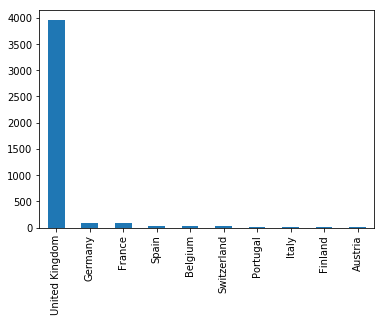

In [8]:
#Top ten country's customer
filtered_data.Country.value_counts()[:10].plot(kind='bar')

In [9]:
uk_data=data[data.Country=='United Kingdom']

In [10]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 541893
Data columns (total 8 columns):
InvoiceNo      361878 non-null object
StockCode      361878 non-null object
Description    361878 non-null object
Quantity       361878 non-null int64
InvoiceDate    361878 non-null datetime64[ns]
UnitPrice      361878 non-null float64
CustomerID     361878 non-null float64
Country        361878 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [11]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [12]:
uk_data = uk_data[(uk_data['Quantity']>0)]
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
InvoiceNo      354345 non-null object
StockCode      354345 non-null object
Description    354345 non-null object
Quantity       354345 non-null int64
InvoiceDate    354345 non-null datetime64[ns]
UnitPrice      354345 non-null float64
CustomerID     354345 non-null float64
Country        354345 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


In [13]:
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

In [14]:
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['UnitPrice']

In [15]:
uk_data['InvoiceDate'].min(),uk_data['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

In [16]:
# setting up a present date. Here it's ~ a year after the data was collected, which makes sense for analysis
PRESENT = dt.datetime(2011,12,10)
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

In [17]:
uk_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


# RFM Analysis

In [18]:
rfm = uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})

In [19]:
rfm.columns

Index(['InvoiceDate', 'InvoiceNo', 'TotalPrice'], dtype='object')

In [20]:
rfm

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [21]:
# Change the name of columns
rfm.columns=['recency','frequency','monetary']

In [22]:
rfm

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [23]:
rfm['recency'] = rfm['recency'].astype(int)

In [24]:
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [25]:
# rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
# rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
# rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])
rfm['r_quartile'] = pd.qcut(rfm['recency'], 2, ['1','2'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 2, ['2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 2, ['2','1'])

In [26]:
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,2,2,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,1,1


In [27]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str) + rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,2,2,1,221
12747.0,2,103,4196.01,1,1,1,111
12748.0,0,4596,33719.73,1,1,1,111
12749.0,3,199,4090.88,1,1,1,111
12820.0,3,59,942.34,1,1,1,111


In [28]:
# Filter out Top/Best cusotmers
rfm[rfm['RFM_Score']=='111'].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
18102.0,0,431,259657.30,1,1,1,111
17450.0,8,337,194550.79,1,1,1,111
17511.0,2,963,91062.38,1,1,1,111
16029.0,38,242,81024.84,1,1,1,111
16684.0,4,277,66653.56,1,1,1,111


## Visualization

In [29]:
rfm

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,2,2,1,221
12747.0,2,103,4196.01,1,1,1,111
12748.0,0,4596,33719.73,1,1,1,111
12749.0,3,199,4090.88,1,1,1,111
12820.0,3,59,942.34,1,1,1,111
...,...,...,...,...,...,...,...
18280.0,277,10,180.60,2,2,2,222
18281.0,180,7,80.82,2,2,2,222
18282.0,7,12,178.05,1,2,2,122


In [30]:
rfm_plot = pd.DataFrame(rfm).drop(['r_quartile', 'f_quartile', 'm_quartile'], axis=1)
rfm_plot

,recency,frequency,monetary,RFM_Score
CustomerID,,,,
12346.0,325,1,77183.60,221
12747.0,2,103,4196.01,111
12748.0,0,4596,33719.73,111
12749.0,3,199,4090.88,111
12820.0,3,59,942.34,111
...,...,...,...,...
18280.0,277,10,180.60,222
18281.0,180,7,80.82,222
18282.0,7,12,178.05,122


In [31]:
myplot = rfm_plot.sort_values(by=['RFM_Score'])
myplot.RFM_Score.unique()

array(['111', '112', '121', '122', '211', '212', '221', '222'],
      dtype=object)

In [32]:
# make 3 groups 

In [33]:
myplot

,recency,frequency,monetary,RFM_Score
CustomerID,,,,
18287.0,42,70,1837.28,111
17324.0,17,50,990.23,111
14794.0,2,80,1319.91,111
14790.0,16,46,745.06,111
17338.0,17,753,6643.93,111
...,...,...,...,...
15224.0,358,14,322.08,222
15225.0,234,23,409.40,222
15226.0,310,8,154.41,222


In [34]:
def sum_digits(digit):
    return sum(int(x) for x in digit if x.isdigit())

In [35]:
myplot['RFM_Score_sum'] = [sum_digits(x) for x in myplot['RFM_Score']]
myplot

,recency,frequency,monetary,RFM_Score,RFM_Score_sum
CustomerID,,,,,
18287.0,42,70,1837.28,111,3
17324.0,17,50,990.23,111,3
14794.0,2,80,1319.91,111,3
14790.0,16,46,745.06,111,3
17338.0,17,753,6643.93,111,3
...,...,...,...,...,...
15224.0,358,14,322.08,222,6
15225.0,234,23,409.40,222,6
15226.0,310,8,154.41,222,6


In [36]:
myplot['category'] = np.select(
    [
        myplot['RFM_Score_sum'] == 3,
        myplot['RFM_Score_sum'] == 4,
        myplot['RFM_Score_sum'] == 5,
        myplot['RFM_Score_sum'] == 6
    ], 
    [
        'Good',
        'Medium 1',
        'Medium 2',
        'Bad'
    ], 
    default='Unknown'
)

In [37]:
myplot

,recency,frequency,monetary,RFM_Score,RFM_Score_sum,category
CustomerID,,,,,,
18287.0,42,70,1837.28,111,3,Good
17324.0,17,50,990.23,111,3,Good
14794.0,2,80,1319.91,111,3,Good
14790.0,16,46,745.06,111,3,Good
17338.0,17,753,6643.93,111,3,Good
...,...,...,...,...,...,...
15224.0,358,14,322.08,222,6,Bad
15225.0,234,23,409.40,222,6,Bad
15226.0,310,8,154.41,222,6,Bad


In [38]:
sns.set(style="whitegrid")

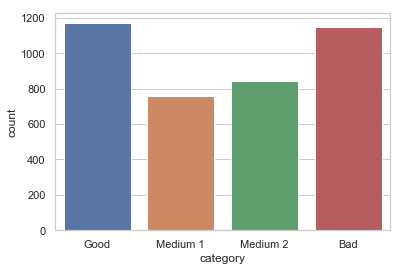

In [39]:
ax = sns.countplot(x="category", data=myplot)

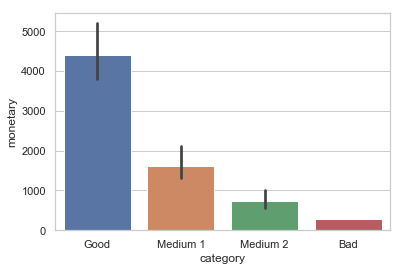

In [40]:
ax = sns.barplot(x="category", y="monetary", data=myplot)

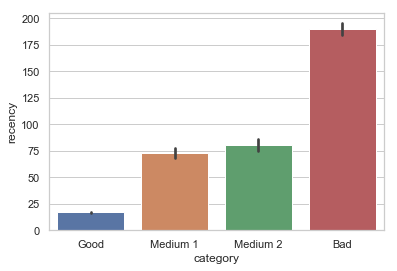

In [41]:
ax = sns.barplot(x="category", y="recency", data=myplot)

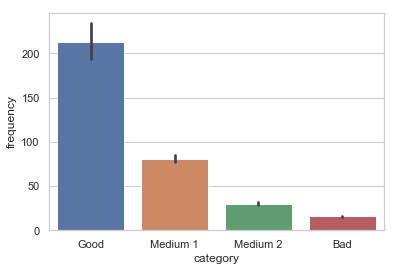

In [42]:
ax = sns.barplot(x="category", y="frequency", data=myplot)

In [43]:
# saving dataset with ids and category name for comparing ids with the ones we'll get with k-means and other algorithms
ids_category = myplot.category
ids_category.to_csv('ids_category.csv')
ids_category

/Users/valkoiset/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


CustomerID
18287.0    Good
17324.0    Good
14794.0    Good
14790.0    Good
17338.0    Good
           ... 
15224.0     Bad
15225.0     Bad
15226.0     Bad
17118.0     Bad
14609.0     Bad
Name: category, Length: 3921, dtype: object